<a href="https://colab.research.google.com/github/JacobRaffety/Project-4/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

Goal:
The goal is to minimize the root mean square error to determine what features cause a song to be a hit. This is done by seeing features importance using supervised learning from decision trees, random forest, and XGBoost models.

## Data Collection/Sources


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import graphviz
from IPython.display import display
from sklearn import tree

In [84]:
#Importing data
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
master_df = pd.read_csv(url)
master_df.head()

Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2230022  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo          6266514  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran         83293380  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X          5473565  27NovPIUIRrOZoCHxABJwK   

                                    Genre  ... Danceability Energy Loudness  \
0  ['indie rock italiano', 'italian pop']  ...        0.714    0.8   -4.808   
1                  ['australian hip hop']  ...        0.591  0.764   -5.484   
2                                 ['pop']  ...        0.563  0.664   -5.044   
3                       ['pop', 'uk pop']  ...        0.808  0.897   -3.712   
4           ['lgbtq+ hip hop', 'pop rap']  ...        0.736  0.704   -7.409   

  Speechiness Acousticness Liveness    Tempo Duration (ms) Valence  Chord  
0      0.0504        0.127    0.359  134.002        211560   0.589      B  
1      0.0483       0.0383    0.103  169.928        141806   0.478  C#/Db  
2       0.154        0.335   0.0849  166.928        178147   0.688      A  
3      0.0348       0.0469    0.364  126.026        231041   0.591      B  
4      0.0615       0.0203   0.0501  149.995        212000   0.894  D#/Eb  

[5 rows x 23 columns]

In [85]:
master_df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [86]:
#Checking data
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [87]:
#Checking data
master_df.describe().transpose()

count        mean         std  min     25%    50%  \
Index                      1556.0  778.500000  449.322824  1.0  389.75  778.5   
Highest Charting Position  1556.0   87.744216   58.147225  1.0   37.00   80.0   
Number of Times Charted    1556.0   10.668380   16.360546  1.0    1.00    4.0   

                               75%     max  
Index                      1167.25  1556.0  
Highest Charting Position   137.00   200.0  
Number of Times Charted      12.00   142.0

In [88]:
master_df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

## Data Cleaning


In [89]:
#Dropping columns that do not have relevance to charting
cleaned_df = pd.DataFrame()
cleaned_df = master_df.drop(['Index','Song ID', 'Song Name', 'Weeks Charted', 'Chord'], axis = 1 )
cleaned_df.head()

Highest Charting Position  Number of Times Charted  \
0                          1                        8   
1                          2                        3   
2                          1                       11   
3                          3                        5   
4                          5                        1   

  Week of Highest Charting     Streams          Artist Artist Followers  \
0   2021-07-23--2021-07-30  48,633,449        Måneskin          3377762   
1   2021-07-23--2021-07-30  47,248,719   The Kid LAROI          2230022   
2   2021-06-25--2021-07-02  40,162,559  Olivia Rodrigo          6266514   
3   2021-07-02--2021-07-09  37,799,456      Ed Sheeran         83293380   
4   2021-07-23--2021-07-30  33,948,454       Lil Nas X          5473565   

                                    Genre Release Date Popularity  \
0  ['indie rock italiano', 'italian pop']   2017-12-08        100   
1                  ['australian hip hop']   2021-07-09         99   
2                                 ['pop']   2021-05-21         99   
3                       ['pop', 'uk pop']   2021-06-25         98   
4           ['lgbtq+ hip hop', 'pop rap']   2021-07-23         96   

  Danceability Energy Loudness Speechiness Acousticness Liveness    Tempo  \
0        0.714    0.8   -4.808      0.0504        0.127    0.359  134.002   
1        0.591  0.764   -5.484      0.0483       0.0383    0.103  169.928   
2        0.563  0.664   -5.044       0.154        0.335   0.0849  166.928   
3        0.808  0.897   -3.712      0.0348       0.0469    0.364  126.026   
4        0.736  0.704   -7.409      0.0615       0.0203   0.0501  149.995   

  Duration (ms) Valence  
0        211560   0.589  
1        141806   0.478  
2        178147   0.688  
3        231041   0.591  
4        212000   0.894

In [90]:
cleaned_df['Streams'] = cleaned_df['Streams'].str.replace(',','')
cleaned_df

Highest Charting Position  Number of Times Charted  \
0                             1                        8   
1                             2                        3   
2                             1                       11   
3                             3                        5   
4                             5                        1   
...                         ...                      ...   
1551                        195                        1   
1552                        196                        1   
1553                        197                        1   
1554                        198                        1   
1555                        199                        1   

     Week of Highest Charting   Streams                         Artist  \
0      2021-07-23--2021-07-30  48633449                       Måneskin   
1      2021-07-23--2021-07-30  47248719                  The Kid LAROI   
2      2021-06-25--2021-07-02  40162559                 Olivia Rodrigo   
3      2021-07-02--2021-07-09  37799456                     Ed Sheeran   
4      2021-07-23--2021-07-30  33948454                      Lil Nas X   
...                       ...       ...                            ...   
1551   2019-12-27--2020-01-03   4630675                       Dua Lipa   
1552   2019-12-27--2020-01-03   4623030                 Jorge & Mateus   
1553   2019-12-27--2020-01-03   4620876                 Camila Cabello   
1554   2019-12-27--2020-01-03   4607385  Dadá Boladão, Tati Zaqui, OIK   
1555   2019-12-27--2020-01-03   4595450                   Taylor Swift   

     Artist Followers                                              Genre  \
0             3377762             ['indie rock italiano', 'italian pop']   
1             2230022                             ['australian hip hop']   
2             6266514                                            ['pop']   
3            83293380                                  ['pop', 'uk pop']   
4             5473565                      ['lgbtq+ hip hop', 'pop rap']   
...               ...                                                ...   
1551         27167675                     ['dance pop', 'pop', 'uk pop']   
1552         15019109           ['sertanejo', 'sertanejo universitario']   
1553         22698747  ['dance pop', 'electropop', 'pop', 'post-teen ...   
1554           208630                     ['brega funk', 'funk carioca']   
1555         42227614                           ['pop', 'post-teen pop']   

     Release Date Popularity Danceability Energy Loudness Speechiness  \
0      2017-12-08        100        0.714    0.8   -4.808      0.0504   
1      2021-07-09         99        0.591  0.764   -5.484      0.0483   
2      2021-05-21         99        0.563  0.664   -5.044       0.154   
3      2021-06-25         98        0.808  0.897   -3.712      0.0348   
4      2021-07-23         96        0.736  0.704   -7.409      0.0615   
...           ...        ...          ...    ...      ...         ...   
1551   2017-06-02         79        0.762    0.7   -6.021      0.0694   
1552   2019-10-11         66        0.528   0.87   -3.123      0.0851   
1553   2018-01-12         81        0.765  0.523   -4.333        0.03   
1554   2019-09-25         60        0.832   0.55   -7.026      0.0587   
1555   2019-11-13         70        0.448  0.603   -7.176       0.064   

     Acousticness Liveness    Tempo Duration (ms) Valence  
0           0.127    0.359  134.002        211560   0.589  
1          0.0383    0.103  169.928        141806   0.478  
2           0.335   0.0849  166.928        178147   0.688  
3          0.0469    0.364  126.026        231041   0.591  
4          0.0203   0.0501  149.995        212000   0.894  
...           ...      ...      ...           ...     ...  
1551      0.00261    0.153  116.073        209320   0.608  
1552         0.24    0.333   152.37        181930   0.714  
1553        0.184    0.132  104.988        217307   0.394  
1554  

In [91]:
#I need to turn object columns into floats
not_float = []
float_columns = cleaned_df.drop(['Highest Charting Position', 'Number of Times Charted','Week of Highest Charting','Artist', 'Genre', 'Release Date'], axis = 1)
float_columns

Streams Artist Followers Popularity Danceability Energy Loudness  \
0     48633449          3377762        100        0.714    0.8   -4.808   
1     47248719          2230022         99        0.591  0.764   -5.484   
2     40162559          6266514         99        0.563  0.664   -5.044   
3     37799456         83293380         98        0.808  0.897   -3.712   
4     33948454          5473565         96        0.736  0.704   -7.409   
...        ...              ...        ...          ...    ...      ...   
1551   4630675         27167675         79        0.762    0.7   -6.021   
1552   4623030         15019109         66        0.528   0.87   -3.123   
1553   4620876         22698747         81        0.765  0.523   -4.333   
1554   4607385           208630         60        0.832   0.55   -7.026   
1555   4595450         42227614         70        0.448  0.603   -7.176   

     Speechiness Acousticness Liveness    Tempo Duration (ms) Valence  
0         0.0504        0.127    0.359  134.002        211560   0.589  
1         0.0483       0.0383    0.103  169.928        141806   0.478  
2          0.154        0.335   0.0849  166.928        178147   0.688  
3         0.0348       0.0469    0.364  126.026        231041   0.591  
4         0.0615       0.0203   0.0501  149.995        212000   0.894  
...          ...          ...      ...      ...           ...     ...  
1551      0.0694      0.00261    0.153  116.073        209320   0.608  
1552      0.0851         0.24    0.333   152.37        181930   0.714  
1553        0.03        0.184    0.132  104.988        217307   0.394  
1554      0.0587        0.249    0.182  154.064        152784   0.881  
1555       0.064        0.433   0.0862  205.272        221307   0.422  

[1556 rows x 12 columns]

In [92]:
#Converting columns into float
for i in float_columns:
  try:
    cleaned_df[i] = float_columns[i].astype('float')
  except:
    not_float.append(i)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Streams                    1556 non-null   float64
 4   Artist                     1556 non-null   object 
 5   Artist Followers           1556 non-null   object 
 6   Genre                      1556 non-null   object 
 7   Release Date               1556 non-null   object 
 8   Popularity                 1556 non-null   object 
 9   Danceability               1556 non-null   object 
 10  Energy                     1556 non-null   object 
 11  Loudness                   1556 non-null   object 
 12  Speechiness                1556 non-null   object 
 13  Acousticness               1556 non-null   objec

In [93]:
#The following columns cannot be converted to string. There was an error about a empty string
not_float

['Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']

In [94]:
#printing rows with empty strings
for i in not_float:
  print(cleaned_df[cleaned_df[i] == ' '].index)



Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')


In [95]:
#How many rows have empty strings
print(len(cleaned_df[cleaned_df['Energy'] == ' '].index))

11


In [96]:
#getting rows in a list
indexes = list(cleaned_df[cleaned_df['Energy'] == ' '].index)
indexes

[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]

In [97]:
#Dropping rows with blank strings and turning columns to floats
cleaned_df.drop(indexes, axis = 0, inplace = True)


In [98]:
#Checking empty strings are gone
(cleaned_df['Energy'] == ' ').value_counts()

False    1545
Name: Energy, dtype: int64

In [99]:
#Changing columns to floats
for i in float_columns:
  try:
    cleaned_df[i] = cleaned_df[i].astype('float')
  except:
    not_float.append(i)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Week of Highest Charting   1545 non-null   object 
 3   Streams                    1545 non-null   float64
 4   Artist                     1545 non-null   object 
 5   Artist Followers           1545 non-null   float64
 6   Genre                      1545 non-null   object 
 7   Release Date               1545 non-null   object 
 8   Popularity                 1545 non-null   float64
 9   Danceability               1545 non-null   float64
 10  Energy                     1545 non-null   float64
 11  Loudness                   1545 non-null   float64
 12  Speechiness                1545 non-null   float64
 13  Acousticness               1545 non-null   float

In [100]:
#checking format
cleaned_df['Release Date']

0       2017-12-08
1       2021-07-09
2       2021-05-21
3       2021-06-25
4       2021-07-23
           ...    
1551    2017-06-02
1552    2019-10-11
1553    2018-01-12
1554    2019-09-25
1555    2019-11-13
Name: Release Date, Length: 1545, dtype: object

In [101]:
#Checking to see if release date is in datetime format
cleaned_df['Release Date'] = pd.to_datetime(cleaned_df['Release Date'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  1545 non-null   int64         
 1   Number of Times Charted    1545 non-null   int64         
 2   Week of Highest Charting   1545 non-null   object        
 3   Streams                    1545 non-null   float64       
 4   Artist                     1545 non-null   object        
 5   Artist Followers           1545 non-null   float64       
 6   Genre                      1545 non-null   object        
 7   Release Date               1545 non-null   datetime64[ns]
 8   Popularity                 1545 non-null   float64       
 9   Danceability               1545 non-null   float64       
 10  Energy                     1545 non-null   float64       
 11  Loudness                   1545 non-null   float64       
 12  Speech

In [102]:
#Need to change this to datetime
cleaned_df['Week of Highest Charting']

0       2021-07-23--2021-07-30
1       2021-07-23--2021-07-30
2       2021-06-25--2021-07-02
3       2021-07-02--2021-07-09
4       2021-07-23--2021-07-30
                 ...          
1551    2019-12-27--2020-01-03
1552    2019-12-27--2020-01-03
1553    2019-12-27--2020-01-03
1554    2019-12-27--2020-01-03
1555    2019-12-27--2020-01-03
Name: Week of Highest Charting, Length: 1545, dtype: object

In [103]:
#Splitting dates at the double dash
cleaned_df[['Start_Date_Highest_Charting', 'End_Date_Highest_Charting']] = cleaned_df['Week of Highest Charting'].str.split('--', expand=True)
#changing new columns to datetime
cleaned_df['Start_Date_Highest_Charting'] = pd.to_datetime(cleaned_df['Start_Date_Highest_Charting'])
cleaned_df['End_Date_Highest_Charting'] = pd.to_datetime(cleaned_df['End_Date_Highest_Charting'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Highest Charting Position    1545 non-null   int64         
 1   Number of Times Charted      1545 non-null   int64         
 2   Week of Highest Charting     1545 non-null   object        
 3   Streams                      1545 non-null   float64       
 4   Artist                       1545 non-null   object        
 5   Artist Followers             1545 non-null   float64       
 6   Genre                        1545 non-null   object        
 7   Release Date                 1545 non-null   datetime64[ns]
 8   Popularity                   1545 non-null   float64       
 9   Danceability                 1545 non-null   float64       
 10  Energy                       1545 non-null   float64       
 11  Loudness                     1545 non-null 

In [104]:
#dropping Week of Highest Times charted
cleaned_df = cleaned_df.drop('Week of Highest Charting', axis=1)


In [105]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Highest Charting Position    1545 non-null   int64         
 1   Number of Times Charted      1545 non-null   int64         
 2   Streams                      1545 non-null   float64       
 3   Artist                       1545 non-null   object        
 4   Artist Followers             1545 non-null   float64       
 5   Genre                        1545 non-null   object        
 6   Release Date                 1545 non-null   datetime64[ns]
 7   Popularity                   1545 non-null   float64       
 8   Danceability                 1545 non-null   float64       
 9   Energy                       1545 non-null   float64       
 10  Loudness                     1545 non-null   float64       
 11  Speechiness                  1545 non-null 

In [106]:
#Turning objects into strings
tobestrings = ['Artist','Genre' ]
for i in tobestrings:
  cleaned_df[i] = cleaned_df[i].astype('string')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Highest Charting Position    1545 non-null   int64         
 1   Number of Times Charted      1545 non-null   int64         
 2   Streams                      1545 non-null   float64       
 3   Artist                       1545 non-null   string        
 4   Artist Followers             1545 non-null   float64       
 5   Genre                        1545 non-null   string        
 6   Release Date                 1545 non-null   datetime64[ns]
 7   Popularity                   1545 non-null   float64       
 8   Danceability                 1545 non-null   float64       
 9   Energy                       1545 non-null   float64       
 10  Loudness                     1545 non-null   float64       
 11  Speechiness                  1545 non-null 

In [107]:
#getting a dataframe of just numbers and not streams
numbers_df = cleaned_df.drop(['Artist', 'Genre', 'Release Date','Start_Date_Highest_Charting','End_Date_Highest_Charting' ], axis = 1)
numbers_df.info()
numbers_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Streams                    1545 non-null   float64
 3   Artist Followers           1545 non-null   float64
 4   Popularity                 1545 non-null   float64
 5   Danceability               1545 non-null   float64
 6   Energy                     1545 non-null   float64
 7   Loudness                   1545 non-null   float64
 8   Speechiness                1545 non-null   float64
 9   Acousticness               1545 non-null   float64
 10  Liveness                   1545 non-null   float64
 11  Tempo                      1545 non-null   float64
 12  Duration (ms)              1545 non-null   float64
 13  Valence                    1545 non-null   float

(1545, 14)

In [108]:
predictors = numbers_df.drop(['Highest Charting Position','Number of Times Charted' ], axis=1)

## Exploratory Data Analysis


Plotting data to see relationships


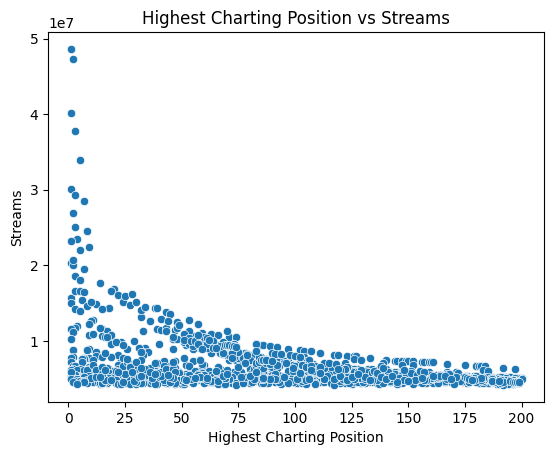

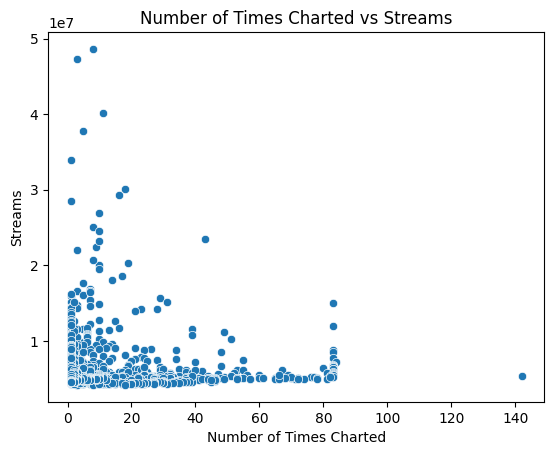

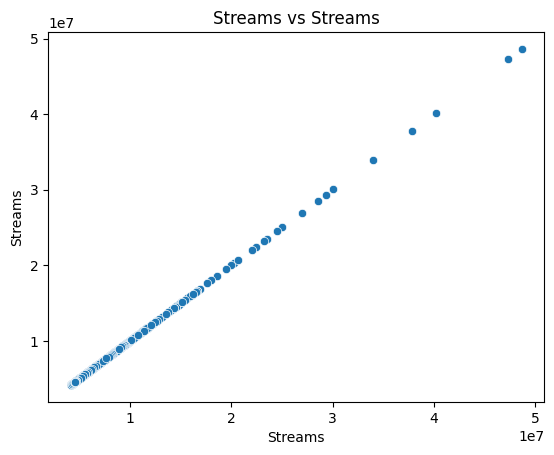

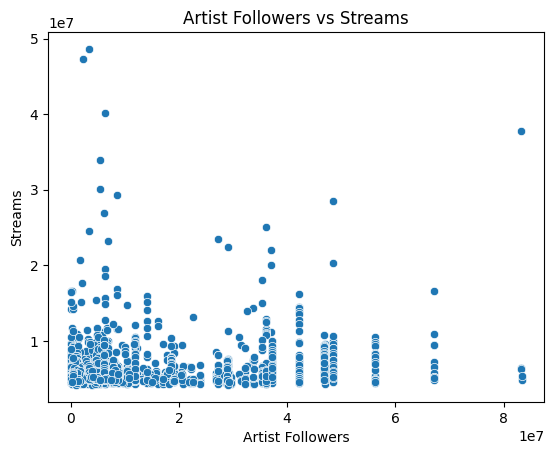

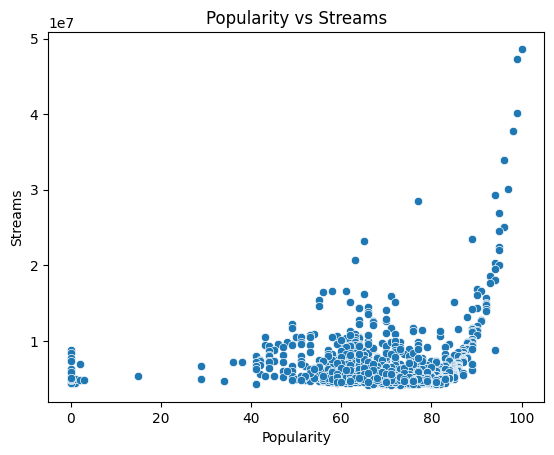

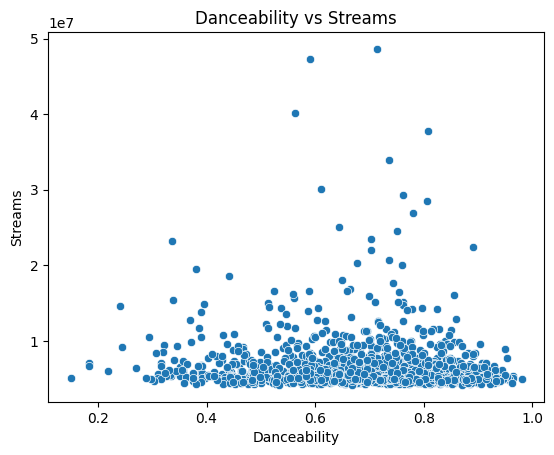

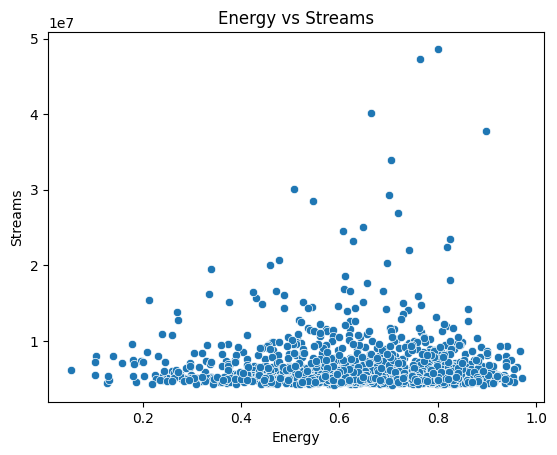

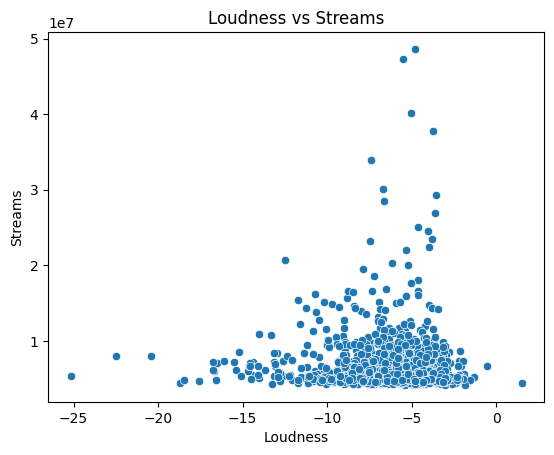

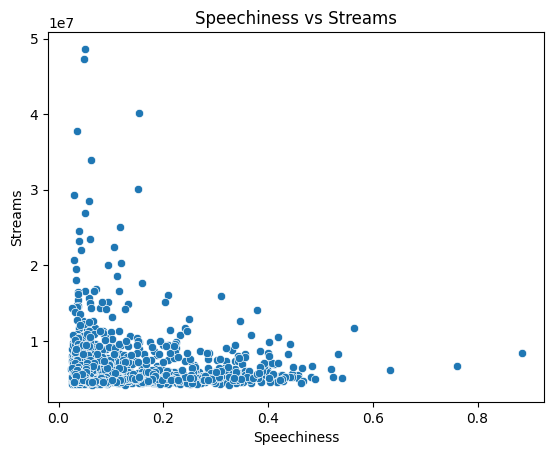

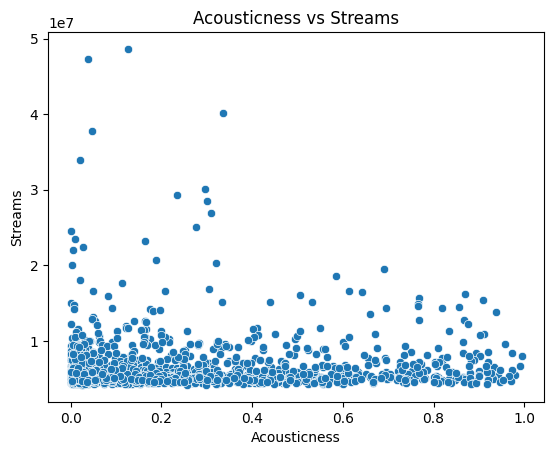

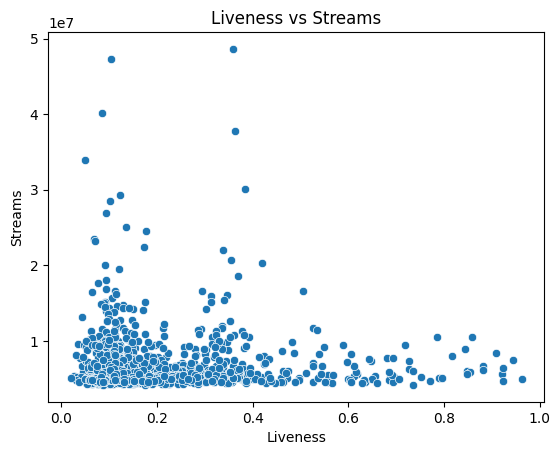

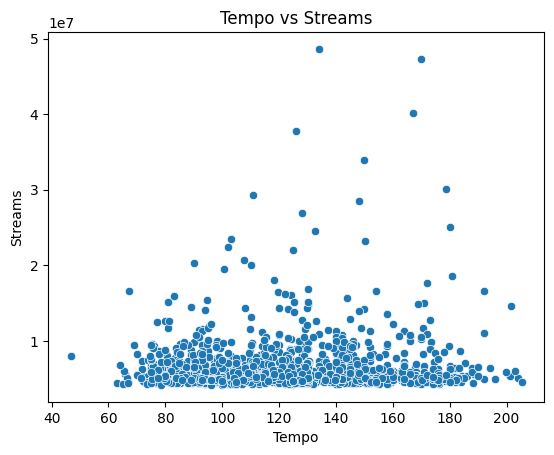

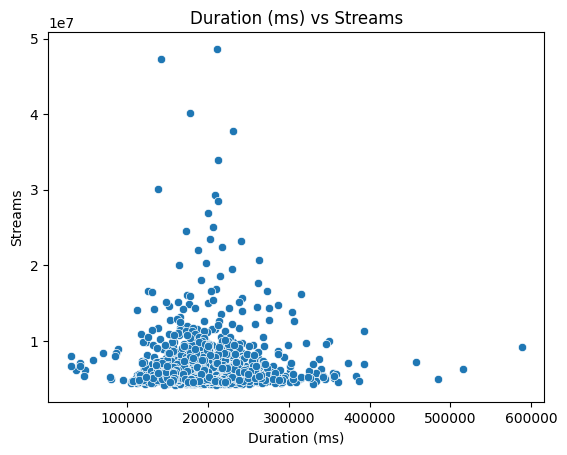

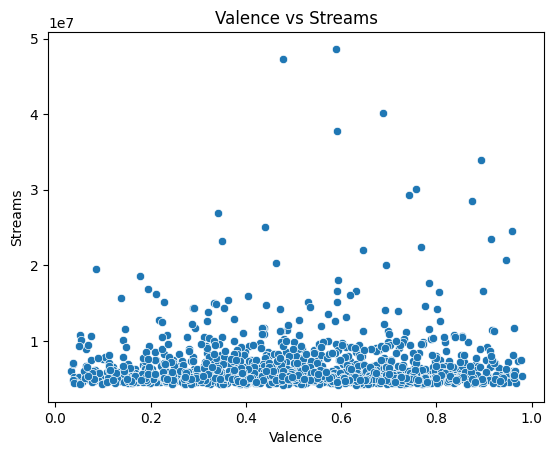

In [109]:
for i in numbers_df:
  sns.scatterplot(x = numbers_df[i], y = cleaned_df['Streams'])
  plt.title(f'{i} vs Streams')
  plt.show()

Plotting heatmap to see correlation of features

<ipython-input-110-68fac780148f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df.corr().round(2)


Text(0.5, 1.0, 'Heatmap of features')

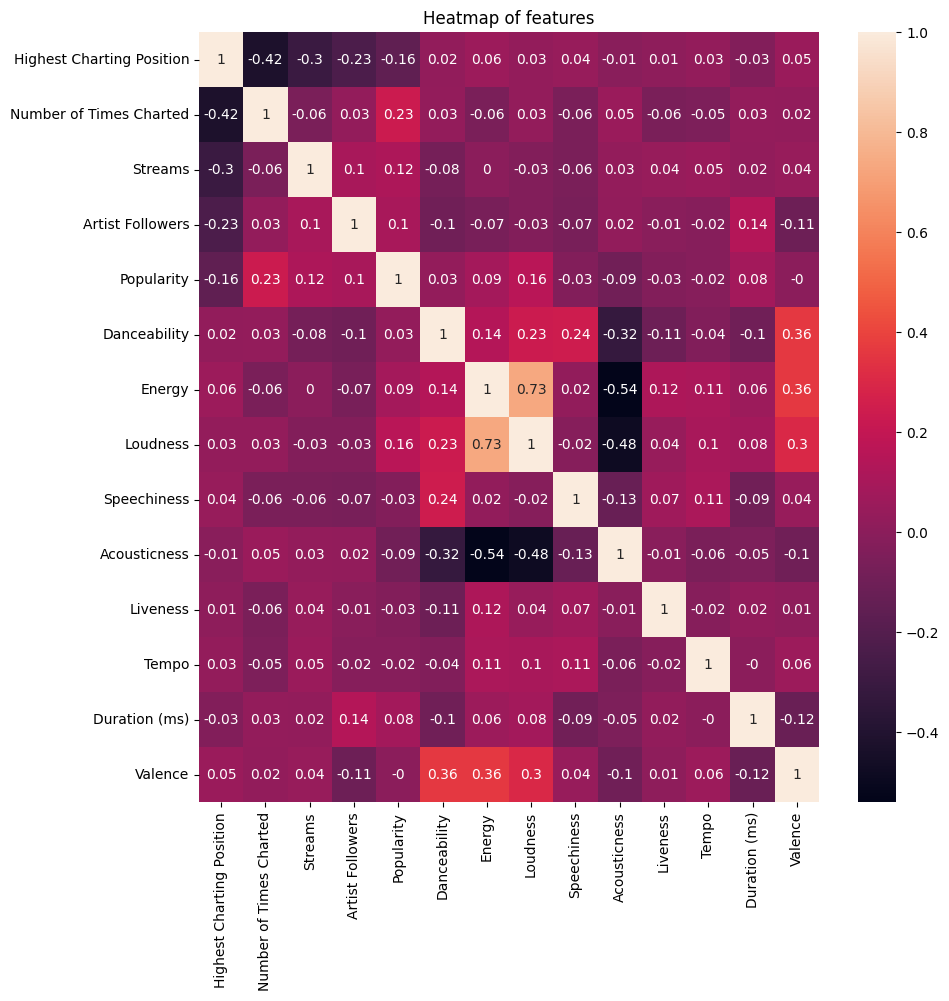

In [110]:
plt.figure(figsize=(10,10))
correlation_matrix = cleaned_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;
plt.title('Heatmap of features')

In [111]:
#hot encoding genre as they may have an affect of popularity and dropping previously dropped rows
encoded_df = master_df['Genre'].str.replace('[', '').str.replace(']', '').str.get_dummies(', ').drop(indexes, axis = 0)
predictors_genres = pd.concat([predictors, encoded_df], axis=1)
encoded_df

<ipython-input-111-d196ae3d3d22>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  encoded_df = master_df['Genre'].str.replace('[', '').str.replace(']', '').str.get_dummies(', ').drop(indexes, axis = 0)


'a cappella'  'acoustic pop'  'adult standards'  'afrofuturism'  \
0     0             0               0                  0               0   
1     0             0               0                  0               0   
2     0             0               0                  0               0   
3     0             0               0                  0               0   
4     0             0               0                  0               0   
...  ..           ...             ...                ...             ...   
1551  0             0               0                  0               0   
1552  0             0               0                  0               0   
1553  0             0               0                  0               0   
1554  0             0               0                  0               0   
1555  0             0               0                  0               0   

      'afroswing'  'albanian hip hop'  'album rock'  'alt z'  \
0               0                   0             0        0   
1               0                   0             0        0   
2               0                   0             0        0   
3               0                   0             0        0   
4               0                   0             0        0   
...           ...                 ...           ...      ...   
1551            0                   0             0        0   
1552            0                   0             0        0   
1553            0                   0             0        0   
1554            0                   0             0        0   
1555            0                   0             0        0   

      'alternative metal'  ...  'vancouver indie'  'vapor trap'  \
0                       0  ...                  0             0   
1                       0  ...                  0             0   
2                       0  ...                  0             0   
3                       0  ...                  0             0   
4                       0  ...                  0             0   
...                   ...  ...                ...           ...   
1551                    0  ...                  0             0   
1552                    0  ...                  0             0   
1553                    0  ...                  0             0   
1554                    0  ...                  0             0   
1555                    0  ...                  0             0   

      'vegas indie'  'venezuelan hip hop'  'viral pop'  'viral rap'  \
0                 0                     0            0            0   
1                 0                     0            0            0   
2                 0                     0            0            0   
3                 0                     0            0            0   
4                 0                     0            0            0   
...             ...                   ...          ...          ...   
1551              0                     0            0            0   
1552              0                     0            0            0   
1553              0                     0            0            0   
1554              0                     0            0            0   
1555              0                     0            0            0   

      'vocal jazz'  'weirdcore'  'west coast rap'  'yacht rock'  
0                0            0                 0             0  
1                0            0                 0             0  
2                0            0                 0             0  
3                0            0                 0             0  
4                0            0                 0             0  
...            ...          ...               ...           ...  
1551             0            0                 0             0  
1552             0            0                 0             0  
1553             0            0                 0             0  
1554     

In [112]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Streams           1545 non-null   float64
 1   Artist Followers  1545 non-null   float64
 2   Popularity        1545 non-null   float64
 3   Danceability      1545 non-null   float64
 4   Energy            1545 non-null   float64
 5   Loudness          1545 non-null   float64
 6   Speechiness       1545 non-null   float64
 7   Acousticness      1545 non-null   float64
 8   Liveness          1545 non-null   float64
 9   Tempo             1545 non-null   float64
 10  Duration (ms)     1545 non-null   float64
 11  Valence           1545 non-null   float64
dtypes: float64(12)
memory usage: 156.9 KB


Text(0.5, 1.0, 'Heatmap of Predictors')

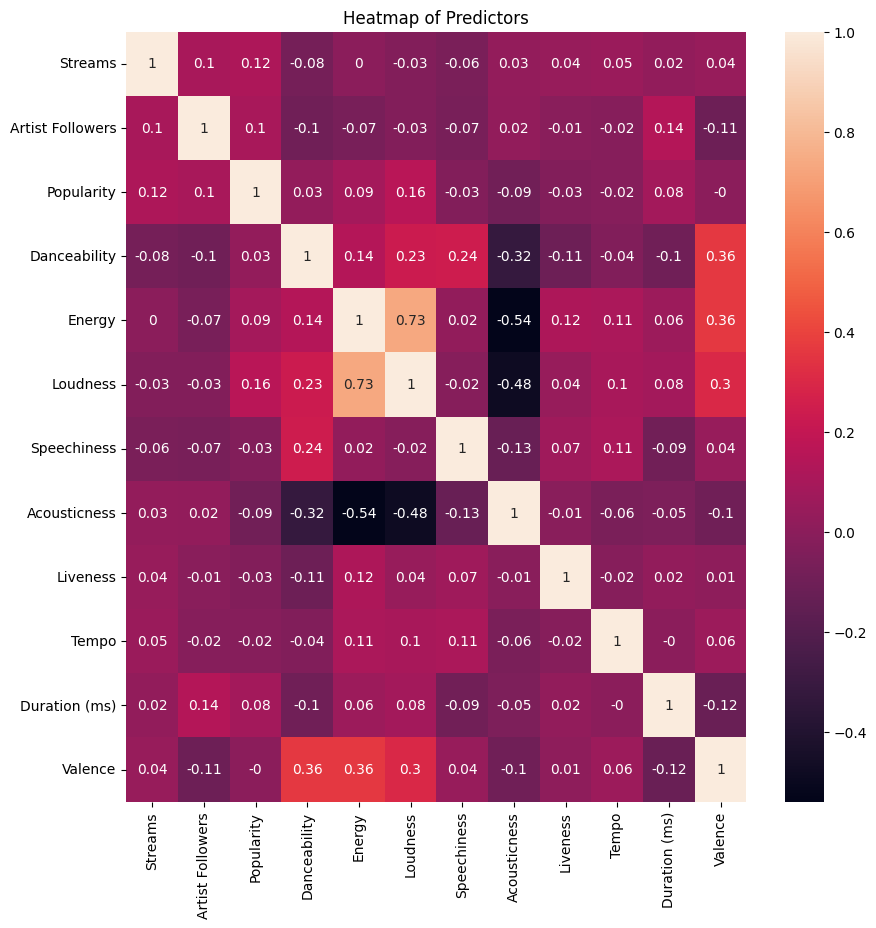

In [113]:
plt.figure(figsize=(10,10))
correlation_matrix = predictors.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;
plt.title('Heatmap of Predictors')

## Processing


In [114]:
X2 = predictors.drop('Streams', axis=1)
Y2 = predictors['Streams']

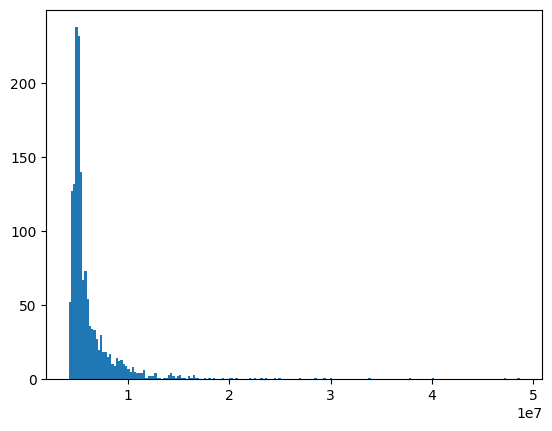

In [115]:
plt.hist(Y2, bins=200);



### Standard K fold on random forest


In [116]:
model = RandomForestRegressor()
Y_predict = model.fit(X2, Y2)
scores = cross_val_score(model, X2, Y2, cv=5, scoring='neg_mean_squared_error')


In [117]:
rmse_1 = (np.abs(scores)**0.5).round(2)

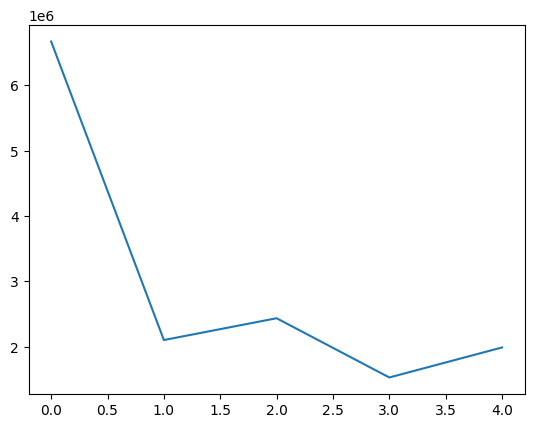

In [118]:
plt.plot(rmse_1);

### Shuffling with CV and K fold


In [120]:
from sklearn.model_selection import KFold
import sklearn
# sklearn.set_config(enable_metadata_routing=True)
rng = np.random.RandomState()
model = RandomForestRegressor(random_state=rng)
Y_predict = model.fit(X2, Y2)
cv = KFold(shuffle=True, random_state=rng, n_splits=10)
scores = cross_val_score(model, X2, Y2, cv=cv, scoring='neg_mean_squared_error')


In [121]:
np.abs(scores)**0.5

array([2084099.31909997, 2213218.3525822 , 1529115.00444977,
       1542970.88036376, 2120171.74654267, 2632064.98267688,
       1665845.85489404, 1672542.36765445, 2486392.51344346,
       1847311.33741124])

In [122]:
cv.get_n_splits()

10

In [123]:
#Following code has ppularity as target without genres
X = predictors.drop('Popularity', axis=1)
Y = predictors['Popularity']
print(X.shape)
print(Y.shape)
predictors

#remove highest charting position and number of times charted

(1545, 11)
(1545,)


Streams  Artist Followers  Popularity  Danceability  Energy  \
0     48633449.0         3377762.0       100.0         0.714   0.800   
1     47248719.0         2230022.0        99.0         0.591   0.764   
2     40162559.0         6266514.0        99.0         0.563   0.664   
3     37799456.0        83293380.0        98.0         0.808   0.897   
4     33948454.0         5473565.0        96.0         0.736   0.704   
...          ...               ...         ...           ...     ...   
1551   4630675.0        27167675.0        79.0         0.762   0.700   
1552   4623030.0        15019109.0        66.0         0.528   0.870   
1553   4620876.0        22698747.0        81.0         0.765   0.523   
1554   4607385.0          208630.0        60.0         0.832   0.550   
1555   4595450.0        42227614.0        70.0         0.448   0.603   

      Loudness  Speechiness  Acousticness  Liveness    Tempo  Duration (ms)  \
0       -4.808       0.0504       0.12700    0.3590  134.002       211560.0   
1       -5.484       0.0483       0.03830    0.1030  169.928       141806.0   
2       -5.044       0.1540       0.33500    0.0849  166.928       178147.0   
3       -3.712       0.0348       0.04690    0.3640  126.026       231041.0   
4       -7.409       0.0615       0.02030    0.0501  149.995       212000.0   
...        ...          ...           ...       ...      ...            ...   
1551    -6.021       0.0694       0.00261    0.1530  116.073       209320.0   
1552    -3.123       0.0851       0.24000    0.3330  152.370       181930.0   
1553    -4.333       0.0300       0.18400    0.1320  104.988       217307.0   
1554    -7.026       0.0587       0.24900    0.1820  154.064       152784.0   
1555    -7.176       0.0640       0.43300    0.0862  205.272       221307.0   

      Valence  
0       0.589  
1       0.478  
2       0.688  
3       0.591  
4       0.894  
...       ...  
1551    0.608  
1552    0.714  
1553    0.394  
1554    0.881  
1555    0.422  

[1545 rows x 12 columns]

In [124]:
#calculating RMSE with popularity as predictor
numLoops = 100
mean_error = np.zeros(numLoops)


for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)**0.5
mean_error.mean()

10.853178944019517

In [186]:
X = predictors.drop('Popularity', axis=1)
Y = predictors['Popularity']

In [168]:
#calculating RMSE with popularity as predictor with forest
numLoops = 50

mean_error = np.zeros(numLoops)


for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )**0.5

mean_error.min()

9.123136419180486

Text(0, 0.5, "Feature's Importance")

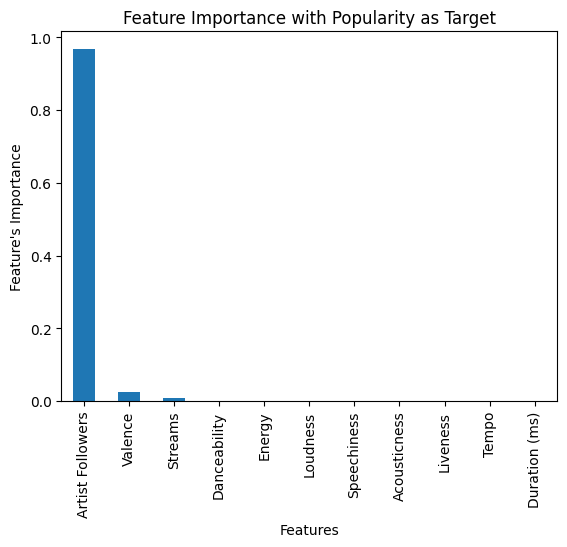

In [194]:

importances = model.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )
print(zip(importances, X.columns))
plt.figure()
forest_importances.sort_values( ascending = False ).plot.bar()


plt.title('Feature Importance with Popularity as Target')
plt.xlabel('Features')
plt.ylabel("Feature's Importance")

In [166]:

mean_error

array([2045777.2050878 , 1990536.73989047, 1741092.31983889,
       2355830.53609796, 2060285.44450198, 1787221.02743306,
       2354999.06285925, 1953332.21767749, 1944865.11391945,
       2268184.83040108, 1771448.59820466, 2051855.5801947 ,
       2409181.60127141, 2004230.0201138 , 2195613.65097648,
       2263716.484779  , 2207946.75800744, 2514717.46989918,
       1922208.04110397, 2239691.75745174, 2829483.83243543,
       1976563.46932954, 2167152.93268365, 2382727.26292728,
       2562093.79023337, 1750306.09084269, 2543603.70363888,
       2039403.35958578, 1933937.71161288, 2258255.39955409,
       2146808.03211716, 2428274.1279033 , 1488933.94416776,
       2173771.55597793, 2411975.297235  , 2231823.03339744,
       2895346.8755709 , 2268748.48230344, 2641188.57434301,
       1810646.59911096, 2297992.40349564, 2026088.50326067,
       2187607.36363177, 2396345.70675879, 2224219.63328806,
       2413513.44419659, 1963053.36047724, 1829810.64155345,
       2159567.58913448,

In [169]:
X = predictors.drop('Popularity', axis=1)
Y = predictors['Popularity']

In [170]:
#trying with xgb boost
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)**0.5

In [171]:
mse_xgb.mean()

11.081409657120497

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [126]:
#calculating RMSE with genres
X = predictors_genres.drop('Popularity', axis=1)
Y = predictors_genres['Popularity']

In [127]:
numLoops = 100
mean_error = np.zeros(numLoops)


for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)**0.5
mean_error.mean()

10.659355445772544

In [128]:
#calculating RMSE with popularity as predictor with forest with genres encoded
numLoops = 50

mean_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )**0.5

mean_error.mean()

9.882851581122654

In [129]:
#trying with xgb boost
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)**0.5

In [130]:
 mse_xgb[idx].mean()

8.387719617803558

In [131]:
#Trying a range of tree sizes for Popularity as target
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed()
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test,y_pred_rf))


  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [132]:
rmse_results

array([10.00756013,  9.75208955,  9.64830215,  9.5314691 ,  9.67667351])

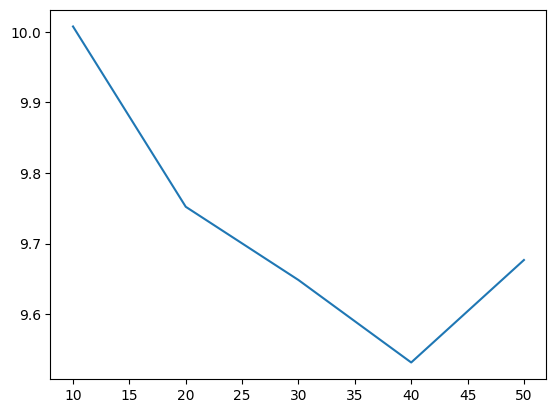

In [133]:
plt.plot(range(10,60,10), rmse_results);

In [135]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )
print(zip(importances, X.columns))
plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ) #.plot.bar()
# plt.title("Feature importances")
# plt.ylabel('Feature Importance Score') ;

Artist Followers           0.490623
Streams                    0.097475
Loudness                   0.064907
Danceability               0.033751
Duration (ms)              0.032628
                             ...   
'sudanese pop'             0.000000
'swedish pop'              0.000000
'american folk revival'    0.000000
'german techno'            0.000000
'norteno'                  0.000000
Length: 346, dtype: float64

<Figure size 640x480 with 0 Axes>

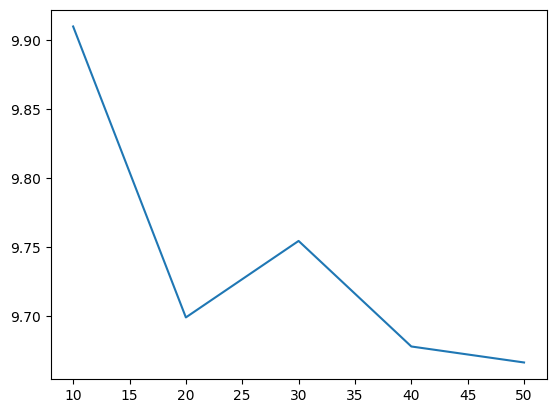

In [139]:
plt.plot(range(10,60,10), rmse_results);
plt.title('RMSE with varying Trees and Popularity as target')

In [179]:
#calculating RMSE with Streams as target
X = predictors_genres.drop('Streams', axis=1)
Y = predictors_genres['Streams']

In [143]:
numLoops = 100
mean_error_tree = np.zeros(numLoops)


for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error_tree[idx] = mean_squared_error(y_test, y_pred)**0.5
mean_error_tree.mean()

2156341.2769201137

In [144]:
#calculating RMSE with loudness as predictor with forest with genres encoded
numLoops = 50

mean_error_forest = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error_forest[idx] = mean_squared_error( y_test, y_pred )**0.5

mean_error_forest.mean()

2039812.7192246325

In [180]:
#Trying with XGBoost
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)**0.5


In [181]:
mse_xgb.mean()

2089747.0796803746

In [147]:
#Varying the number of trees per forest with Loudness as target
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test,y_pred_rf))


  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()


10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


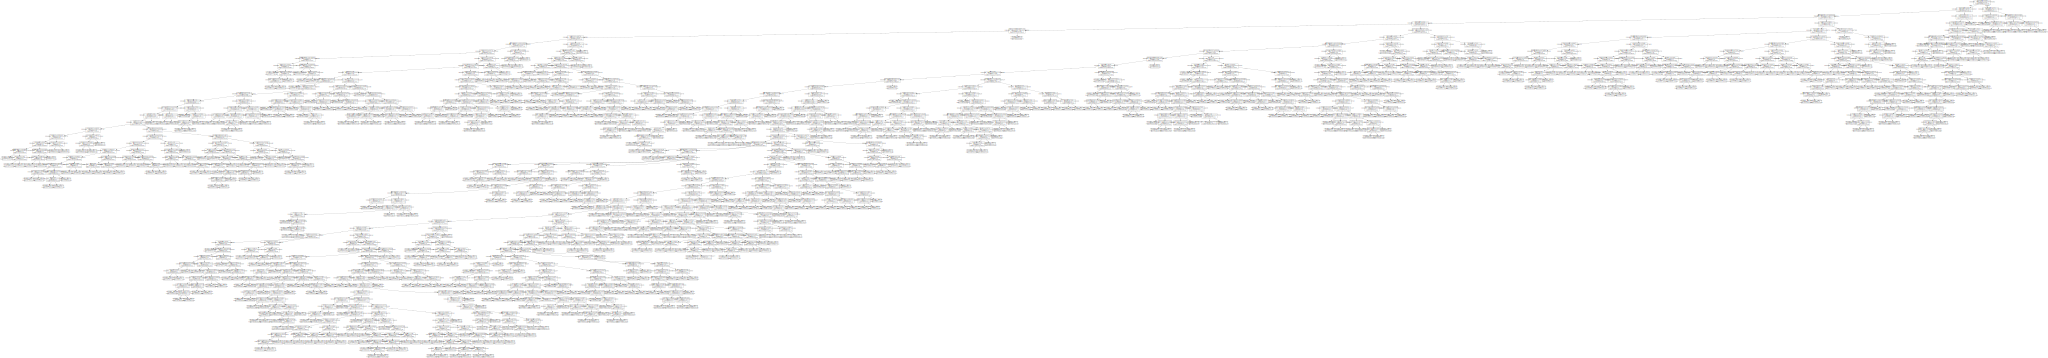

In [148]:
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

In [149]:
rmse_results

array([2064956.72971695, 1992578.49529484, 2008232.85000768,
       2051666.18499471, 1997652.73984382])

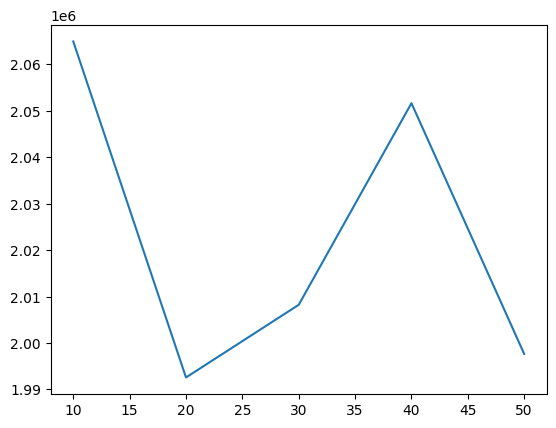

In [150]:
plt.plot(range(10,60,10), rmse_results);


In [151]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )
print(zip(importances, X.columns))
plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False )

Popularity          0.702629
Artist Followers    0.034311
Valence             0.027547
Speechiness         0.024129
Loudness            0.022932
                      ...   
'celtic rock'       0.000000
'funk 150 bpm'      0.000000
'celtic punk'       0.000000
'canadian latin'    0.000000
'soul'              0.000000
Length: 346, dtype: float64

<Figure size 640x480 with 0 Axes>

In [175]:
X = predictors.drop('Streams', axis=1)
Y = predictors['Streams']

In [176]:
numLoops = 100
mean_error = np.zeros(numLoops)


for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)**0.5
mean_error.mean()

2167328.0829253215

In [153]:
#Varying the number of trees per forest with Loudness as target
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test,y_pred_rf))


  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [174]:
rmse_results

array([2117051.30552098, 2033208.44518483, 2053301.43378733,
       2081205.58737816, 2033723.87970036])

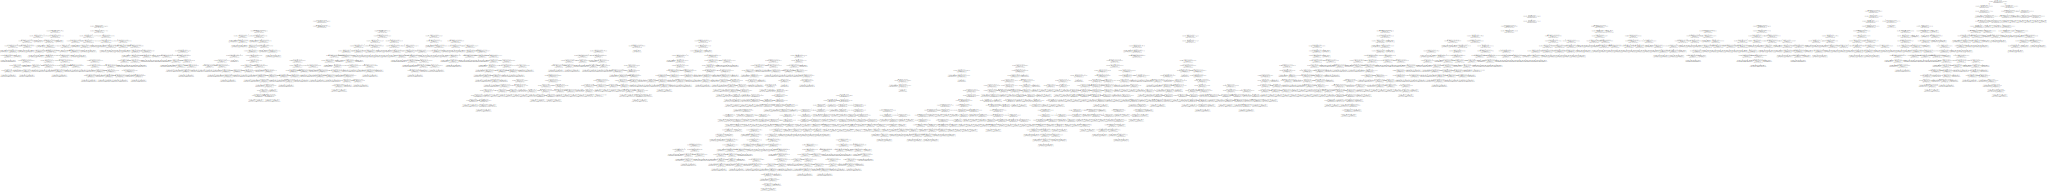

In [154]:


# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

Text(0.5, 1.0, 'The RMSE values vs how many trees per forest.')

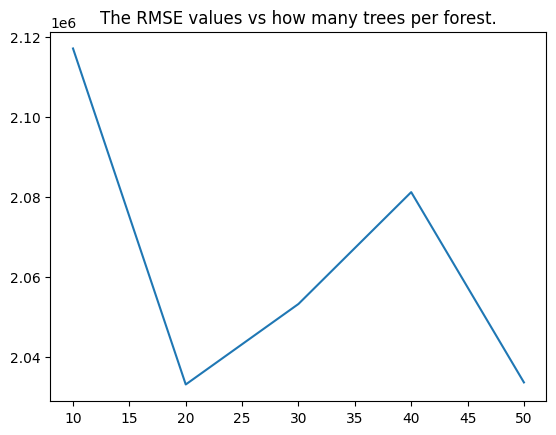

In [156]:
plt.plot(range(10,60,10), rmse_results);
plt.title('The RMSE values vs how many trees per forest.')

In [157]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )
print(zip(importances, X.columns))
plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False )

Popularity          0.705780
Artist Followers    0.039119
Valence             0.037759
Speechiness         0.036418
Tempo               0.029278
Loudness            0.028321
Liveness            0.028120
Acousticness        0.026375
Duration (ms)       0.026184
Danceability        0.025633
Energy              0.017012
dtype: float64

<Figure size 640x480 with 0 Axes>

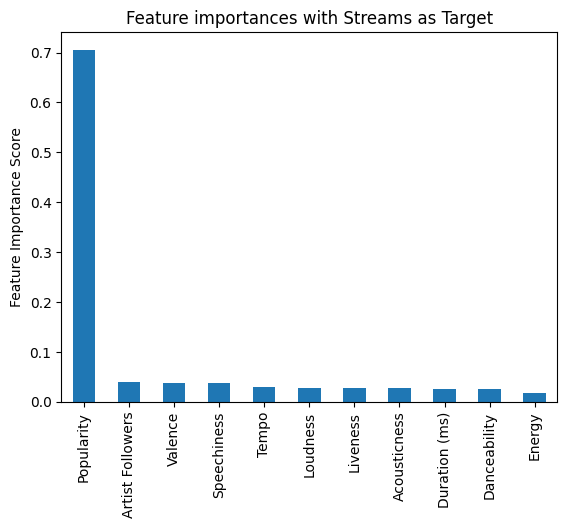

In [158]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )
print(zip(importances, X.columns))
plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances with Streams as Target")
plt.ylabel('Feature Importance Score') ;

In [159]:
#Trying with XGBoost
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)**0.5

In [160]:
mse_xgb.mean()

2089589.9790760158

In [161]:
#Trying all predictors as targets
results = {}
for i in predictors:
  Y1 = predictors[f'{i}']
  X1 = predictors.drop(f'{i}', axis = 1)

  numLoops = 100
  mean_error_tree = np.zeros(numLoops)


  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=5, random_state=0)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mean_error_tree[idx] = mean_squared_error(y_test, y_pred)**0.5
  results[i] = mean_error_tree.mean()


results


{'Streams': 2209711.2917664098,
 'Artist Followers': 16672994.82556953,
 'Popularity': 11.01782997113335,
 'Danceability': 0.12572483385341163,
 'Energy': 0.10905066311179859,
 'Loudness': 1.7545741837903233,
 'Speechiness': 0.11165124710778204,
 'Acousticness': 0.2032815248575575,
 'Liveness': 0.15067181768898352,
 'Tempo': 31.14996314680658,
 'Duration (ms)': 48432.64759995867,
 'Valence': 0.2085884647954437}

In [162]:
#Storing dictionary of results as a dataframe
results_df =  pd.DataFrame(list(results.items()), columns=['Target', 'RMSE'])
#finding min rmse
results_df.sort_values('RMSE')


Target          RMSE
4             Energy  1.090507e-01
6        Speechiness  1.116512e-01
3       Danceability  1.257248e-01
8           Liveness  1.506718e-01
7       Acousticness  2.032815e-01
11           Valence  2.085885e-01
5           Loudness  1.754574e+00
2         Popularity  1.101783e+01
9              Tempo  3.114996e+01
10     Duration (ms)  4.843265e+04
0            Streams  2.209711e+06
1   Artist Followers  1.667299e+07

In [182]:
predictors['Streams'].max()

48633449.0

## Data Visualization/Communication of Results


<ipython-input-163-16d4b8a6cfd6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


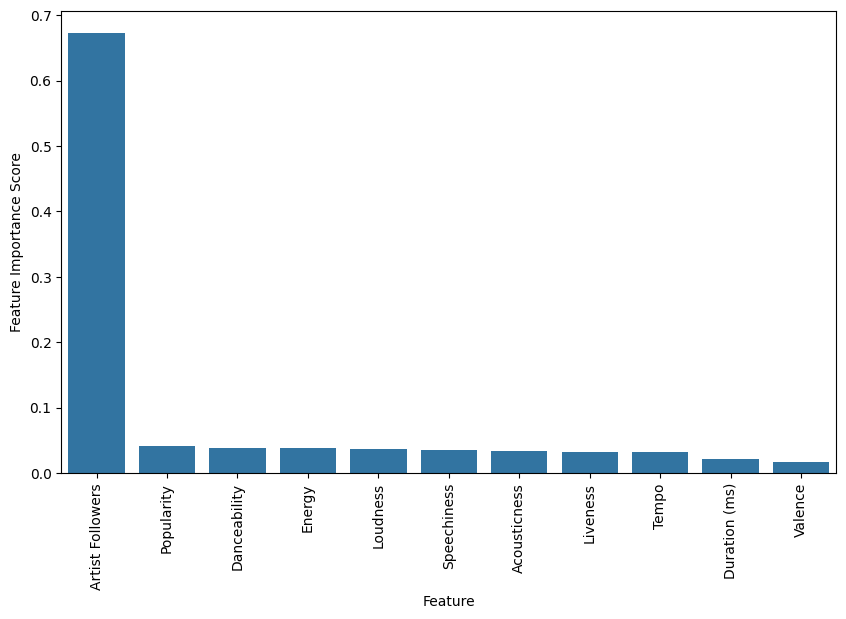

In [163]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns)
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp.sort_values( ascending = False ).values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;

###Conclusion
When streams is selected as the target, all predictors have some weight in the model selection. This coupled with a low RMSE (relative to the maximum) makes me lean towards this being the optimal target for predicting the likelihood of a song charting.
